In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Normalisation des images (valeurs entre 0 et 1)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Chargement des images d'entraînement
train_generator = datagen.flow_from_directory(
    'dogs_vs_cats/train',
    target_size=(128, 128),       # Redimensionne les images à 128x128
    batch_size=32,
    class_mode='categorical',     # Pour classification à plusieurs classes
    subset='training'             # 80% pour l'entraînement
)

# Chargement des images de validation
val_generator = datagen.flow_from_directory(
    'dogs_vs_cats/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'           # 20% pour la validation
)

# Chargement des images de test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dogs_vs_cats/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [4]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.5976 - loss: 0.7379 - val_accuracy: 0.7132 - val_loss: 0.5678
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.7385 - loss: 0.5301 - val_accuracy: 0.7617 - val_loss: 0.4898
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.7925 - loss: 0.4401 - val_accuracy: 0.7725 - val_loss: 0.4872
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.8514 - loss: 0.3389 - val_accuracy: 0.7665 - val_loss: 0.5001
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.9038 - loss: 0.2441 - val_accuracy: 0.7790 - val_loss: 0.5381
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.9419 - loss: 0.1504 - val_accuracy: 0.7845 - val_loss: 0.6027
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9628 - loss: 0.1037 - val_accuracy: 0.7835 - val_loss: 0.6819
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9730 - loss: 0.0793 - val_accurac

In [7]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9799 - loss: 0.0534 - val_accuracy: 0.7860 - val_loss: 0.9981
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9868 - loss: 0.0401 - val_accuracy: 0.7728 - val_loss: 0.9925
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.9862 - loss: 0.0379 - val_accuracy: 0.7862 - val_loss: 1.1192
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9867 - loss: 0.0424 - val_accuracy: 0.7785 - val_loss: 1.1201
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.9883 - loss: 0.0326 - val_accuracy: 0.7857 - val_loss: 1.0611
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.9899 - loss: 0.0362 - val_accuracy: 0.7918 - val_loss: 1.2317
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.7788 - val_loss: 1.2782
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.9909 - loss: 0.0286 - 

In [8]:
model.evaluate(test_generator)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7912 - loss: 1.2577


[1.2715239524841309, 0.7865999937057495]

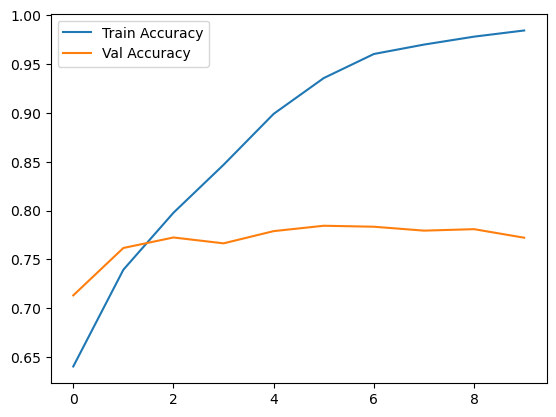

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [10]:
predictions = model.predict(test_generator)
predictions

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


array([[9.9999988e-01, 6.8732611e-08],
       [1.0000000e+00, 2.2253817e-08],
       [9.9976122e-01, 2.3872395e-04],
       ...,
       [1.8467392e-01, 8.1532609e-01],
       [6.6774137e-02, 9.3322593e-01],
       [9.9979478e-01, 2.0519542e-04]], dtype=float32)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Gèle les poids

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


In [14]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Gèle les poids

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [15]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_generator, validation_data=val_generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 38s 74ms/step - accuracy: 0.9314 - loss: 0.4094 - val_accuracy: 0.9595 - val_loss: 0.1110
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.9603 - loss: 0.1036 - val_accuracy: 0.9632 - val_loss: 0.0962
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.9716 - loss: 0.0708 - val_accuracy: 0.9622 - val_loss: 0.1020
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.9772 - loss: 0.0649 - val_accuracy: 0.9632 - val_loss: 0.1059
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 71ms/step - accuracy: 0.9793 - loss: 0.0506 - val_accuracy: 0.9643 - val_loss: 0.1039


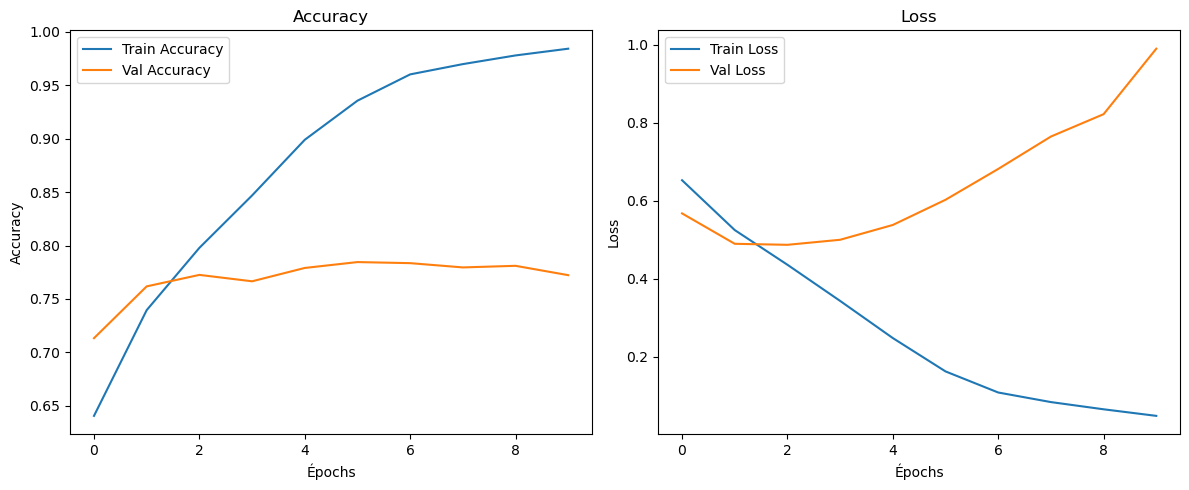

In [20]:
# Visualisation des courbes d'accuracy et de loss
# Courbes d'accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

# Courbes de loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
